**Import Packages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

**Load Dataset**

In [6]:
df_order = pd.read_excel('order_transactions.xlsx')
df_cust = pd.read_csv('customer_data.csv')

### Cleansing

**df_order**

In [7]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     793 non-null    object 
 1   Gender          793 non-null    object 
 2   Marital Status  793 non-null    object 
 3   Salary          776 non-null    float64
 4   Age             767 non-null    float64
 5   Occupation      775 non-null    object 
 6   Customer Name   793 non-null    object 
 7   Region          793 non-null    object 
dtypes: float64(2), object(6)
memory usage: 49.7+ KB


In [8]:
df_cust['Occupation'].value_counts()

Officer                     141
Customer Analyst            138
Customer Service            130
Staff                       126
Self Employed               111
Senior Customer Relation     60
Consultant                   57
BOD                           7
Manager Director              5
Name: Occupation, dtype: int64

In [9]:
#chcek for duplicates data
df_order.duplicated().any()

False

In [10]:
#missing value
df_order.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<AxesSubplot:xlabel='Discount'>

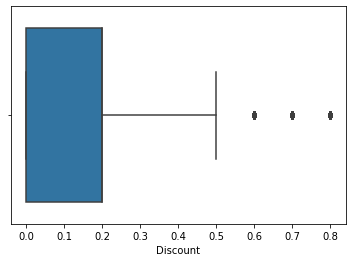

In [11]:
#check for outliers
sns.boxplot(df_order['Discount'])

In [12]:
Q3 = df_order['Discount'].quantile(0.75)
Q1 = df_order['Discount'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [13]:
df_order_2 = df_order.copy()

In [14]:
upper_bound

0.5

In [15]:
df_order_2.loc[df_order_2['Discount']>upper_bound, 'Discount'] = upper_bound

<AxesSubplot:xlabel='Discount'>

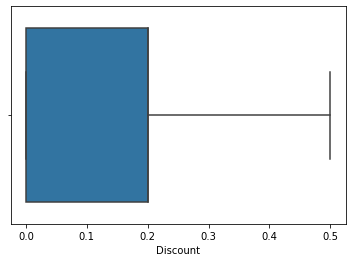

In [16]:
sns.boxplot(df_order_2['Discount'])

<AxesSubplot:xlabel='Sales'>

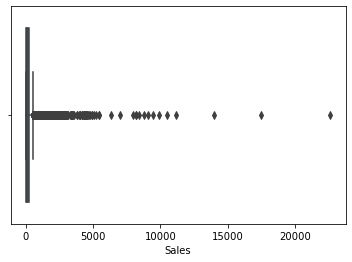

In [17]:
sns.boxplot(df_order_2['Sales'])

Customer Data

In [18]:
df_cust.head(3)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,502.0,21.0,Self Employed,Sharelle Roach,West


In [19]:
df_cust.duplicated().any()

False

In [20]:
df_cust.shape[0]

793

In [21]:
round(df_cust.isnull().sum()/df_cust.shape[0]*100, 2)

Customer ID       0.00
Gender            0.00
Marital Status    0.00
Salary            2.14
Age               3.28
Occupation        2.27
Customer Name     0.00
Region            0.00
dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

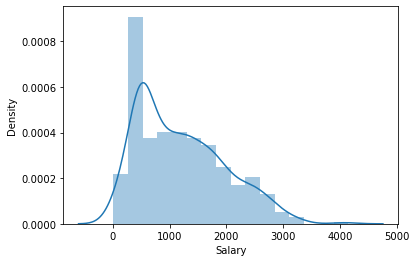

In [22]:
#salary
sns.distplot(df_cust['Salary'])

In [23]:
df_cust['Salary'] = df_cust['Salary'].fillna(df_cust['Salary'].mean())

<AxesSubplot:xlabel='Age', ylabel='Density'>

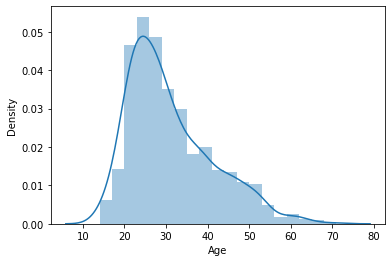

In [24]:
#age
sns.distplot(df_cust['Age'])

In [25]:
df_cust['Age'] = df_cust['Age'].fillna(df_cust['Age'].median())

<AxesSubplot:xlabel='Occupation', ylabel='count'>

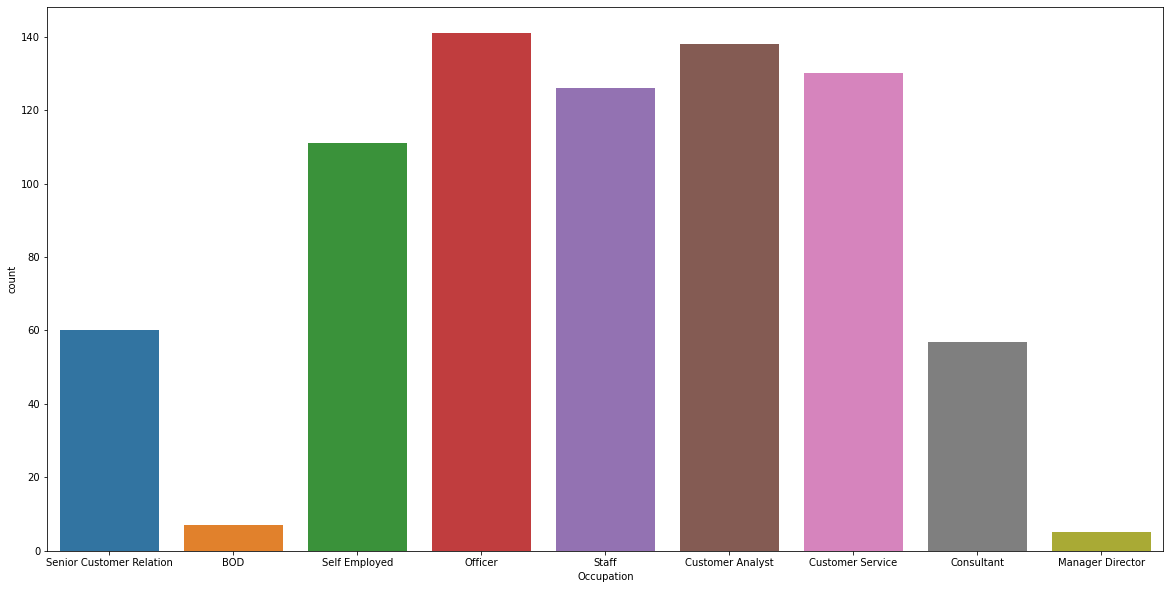

In [26]:
#occupation
plt.figure(figsize=(20,10))
sns.countplot(df_cust['Occupation'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

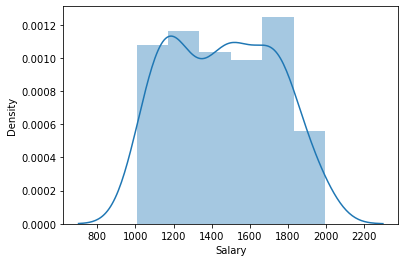

In [27]:
sns.distplot(df_cust[df_cust['Occupation']=='Officer']['Salary'])

In [28]:
df_cust[df_cust['Occupation'].isnull()].head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
76,JM-15655,Female,Married,1203.462629,28.0,NaN,Jim Mitchum,West
87,PO-18850,Female,Not Married,1203.462629,28.0,NaN,Patrick O'Brill,South
88,JK-15625,Female,Married,1203.462629,28.0,NaN,Jim Karlsson,West
123,MF-18250,Female,Not Married,1203.462629,28.0,NaN,Monica Federle,South
272,TM-21490,Female,Married,1000.000000,28.0,NaN,Tony Molinari,East


In [29]:
df_cust['Occupation'].mode()[0]

'Officer'

In [30]:
df_cust['Occupation'] = df_cust['Occupation'].fillna(df_cust['Occupation'].mode()[0])

In [31]:
df_cust.isnull().sum()

Customer ID       0
Gender            0
Marital Status    0
Salary            0
Age               0
Occupation        0
Customer Name     0
Region            0
dtype: int64

<AxesSubplot:xlabel='Salary'>

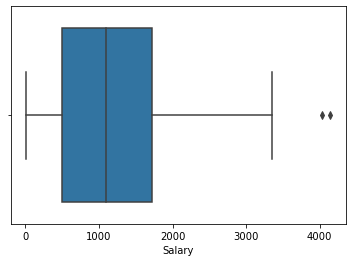

In [32]:
#check outlier
sns.boxplot(df_cust['Salary'])

In [33]:
def handling_outlier(data, kolom, upper=True):
    Q3 = data[kolom].quantile(0.75)
    Q1 = data[kolom].quantile(0.25)
    IQR = Q3-Q1
    upper_range = Q3 + 1.5*IQR
    lower_range = Q1 - 1.5*IQR
    
    if upper == True:
        return upper_range
    else:
        return lower_range

In [34]:
df_cust.loc[(df_cust['Salary']>3800) & (df_cust['Age']<30), 'Salary'] = handling_outlier(df_cust, 'Salary')

<AxesSubplot:xlabel='Salary'>

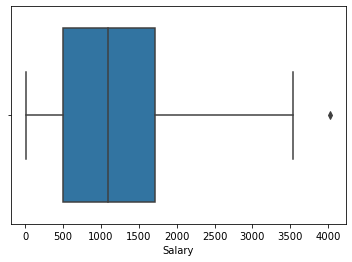

In [35]:
sns.boxplot(df_cust['Salary'])

#### Join Dataframe

In [36]:
df_cust.head(3)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,502.0,21.0,Self Employed,Sharelle Roach,West


In [37]:
df_order.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [38]:
df_order.merge(df_cust, how='left', on=['Customer ID']).shape

(9994, 28)

In [39]:
df_order.shape

(9994, 21)

In [40]:
data = df_order.merge(df_cust, how='left', on=['Customer ID'])

### EDA

Bagaimana distribusi dari sales atau penjualan

<AxesSubplot:xlabel='Sales', ylabel='Density'>

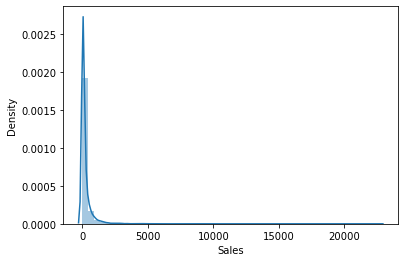

In [41]:
sns.distplot(data['Sales'])

Bagaimana Barang yang Terjual dari Tiap Kategori

<AxesSubplot:xlabel='Category'>

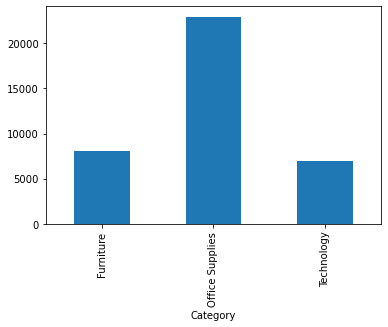

In [42]:
data.groupby('Category')['Quantity'].sum().plot(kind='bar')

Seberapa besar keuntungan dari setiap kategori

<AxesSubplot:xlabel='Category'>

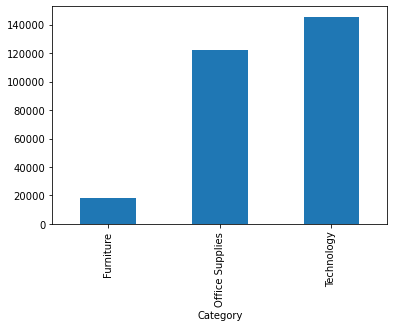

In [43]:
data.groupby('Category')['Profit'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Category'>

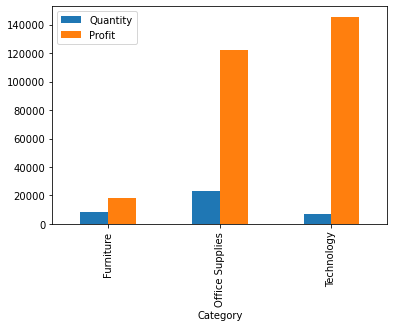

In [44]:
data.groupby('Category').agg({'Quantity': 'sum', 'Profit':'sum'}).plot(kind='bar')

In [45]:
data_cat = data.groupby('Category').agg({'Quantity': 'sum', 'Profit':'sum'}).reset_index()
data_cat

,Category,Quantity,Profit
0,Furniture,8028,18451.2728
1,Office Supplies,22906,122490.8008
2,Technology,6939,145454.9481


<BarContainer object of 3 artists>

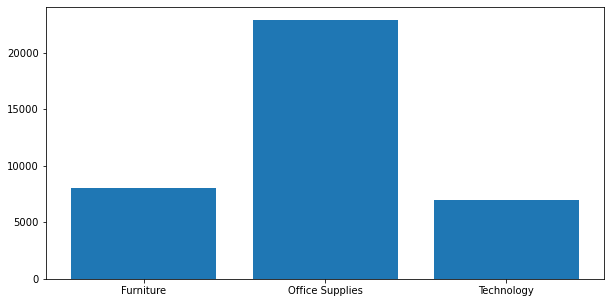

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(data_cat['Category'], data_cat['Quantity'])

Distribusi Sales per Jenis Kelamin

In [47]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name_x,Segment,Country,City,State,Postal Code,Region_x,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Gender,Marital Status,Salary,Age,Occupation,Customer Name_y,Region_y
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Female,Divorced,2468.0,43.0,Senior Customer Relation,Claire Gute,Central
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Female,Divorced,2468.0,43.0,Senior Customer Relation,Claire Gute,Central


<AxesSubplot:xlabel='Sales', ylabel='Density'>

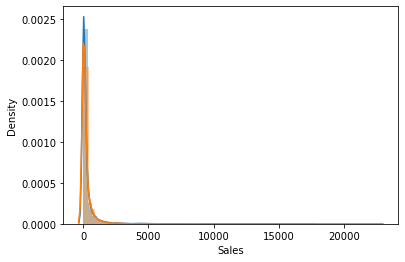

In [48]:
sns.distplot(data[data['Gender']=='Female']['Sales'])
sns.distplot(data[data['Gender']=='Male']['Sales'])

In [49]:
cat_male = data[data['Gender']=='Male'].groupby('Category')['Quantity'].sum().reset_index()
cat_female = data[data['Gender']=='Female'].groupby('Category')['Quantity'].sum().reset_index()

<BarContainer object of 3 artists>

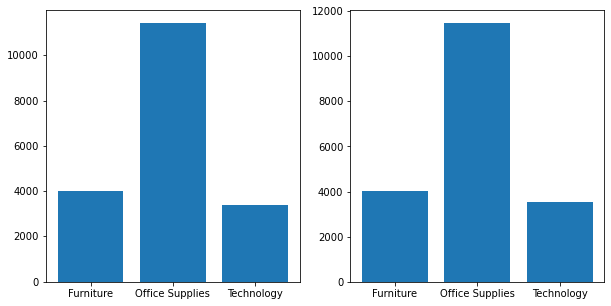

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].bar(cat_male['Category'], cat_male['Quantity'], label='Male')
ax[1].bar(cat_female['Category'], cat_female['Quantity'], label='Female')

<AxesSubplot:xlabel='Sub-Category'>

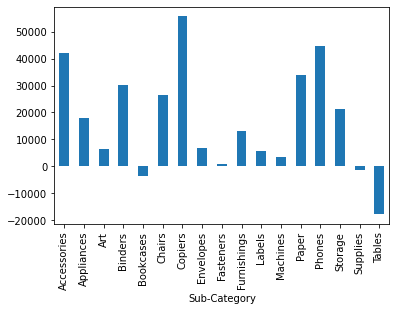

In [51]:
data.groupby('Sub-Category')['Profit'].sum().plot(kind='bar')

In [52]:
data['Marital Status'].unique()

array(['Divorced', 'Married', 'Not Married'], dtype=object)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

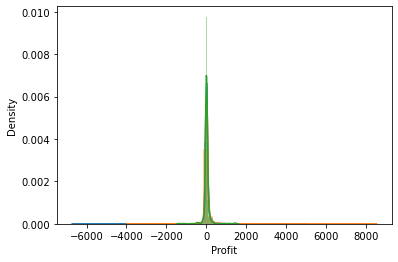

In [53]:
sns.distplot(data[data['Marital Status']=='Married']['Profit'])
sns.distplot(data[data['Marital Status']=='Not Married']['Profit'])
sns.distplot(data[data['Marital Status']=='Divorced']['Profit'])

In [54]:
df_cust.head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,502.0,21.0,Self Employed,Sharelle Roach,West
3,ST-20530,Male,Married,1365.0,46.0,Officer,Shui Tom,East
4,JL-15130,Male,Not Married,431.0,16.0,Staff,Jack Lebron,South


<AxesSubplot:xlabel='Marital Status', ylabel='count'>

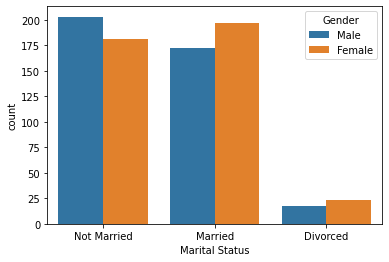

In [55]:
sns.countplot(df_cust['Marital Status'], hue=df_cust['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

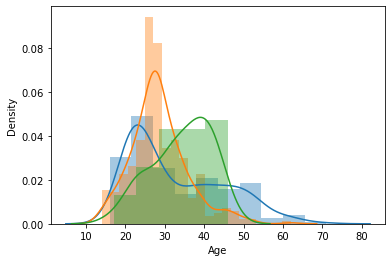

In [56]:
sns.distplot(df_cust[df_cust['Marital Status']=='Married']['Age'])
sns.distplot(df_cust[df_cust['Marital Status']=='Not Married']['Age'])
sns.distplot(df_cust[df_cust['Marital Status']=='Divorced']['Age'])

## Data Preparation

In [57]:
df_cust.head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,502.0,21.0,Self Employed,Sharelle Roach,West
3,ST-20530,Male,Married,1365.0,46.0,Officer,Shui Tom,East
4,JL-15130,Male,Not Married,431.0,16.0,Staff,Jack Lebron,South


Melakukan binning terhadap kolom salary dan age

<AxesSubplot:xlabel='Salary', ylabel='Density'>

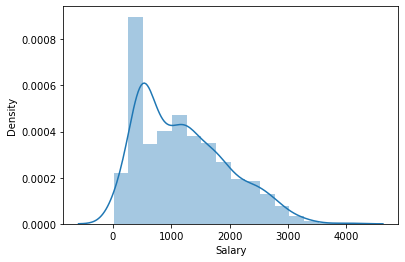

In [58]:
sns.distplot(df_cust['Salary'])

In [59]:
df_cust['Salary'] = pd.cut(df_cust['Salary'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-999', '1000-1999', '2000-2999', '3000-3999', '4000+'])

In [60]:
df_cust.head(3)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2000-2999,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3000-3999,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,0-999,21.0,Self Employed,Sharelle Roach,West


<AxesSubplot:xlabel='Age', ylabel='Density'>

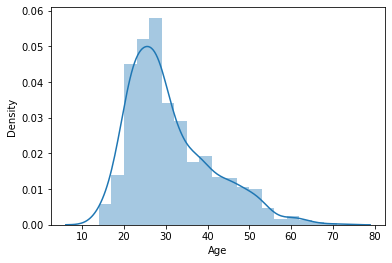

In [61]:
sns.distplot(df_cust['Age'])

In [62]:
df_cust['Age'] = pd.cut(df_cust['Age'], bins=[10,25,40,60,80], labels=['10-24', '25-39', '40-59', '60+'])

In [63]:
df_cust.head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3000-3999,40-59,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,0-999,10-24,Self Employed,Sharelle Roach,West
3,ST-20530,Male,Married,1000-1999,40-59,Officer,Shui Tom,East
4,JL-15130,Male,Not Married,0-999,10-24,Staff,Jack Lebron,South


In [64]:
df_cust.drop(columns=['Customer Name'], inplace=True)

In [65]:
df_cust = df_cust.set_index('Customer ID')

In [66]:
df_cust.head(3)

,Gender,Marital Status,Salary,Age,Occupation,Region
Customer ID,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West
JP-15520,Female,Married,3000-3999,40-59,BOD,West
SR-20425,Female,Married,0-999,10-24,Self Employed,West


### Modeling

In [67]:
!pip install kmodes

In [68]:
from kmodes.kmodes import KModes

**Elbow Method**

In [69]:
cost = []
K = range(1,10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init='random', n_init=5, verbose=1)
    kmode.fit_predict(df_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2791.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 230, cost: 2269.0
Run 1, iteration: 2/100, moves: 23, cost: 2269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 176, cost: 2043.0
Init: initializing centroids


Text(0.5, 0, 'Num of Clusters')

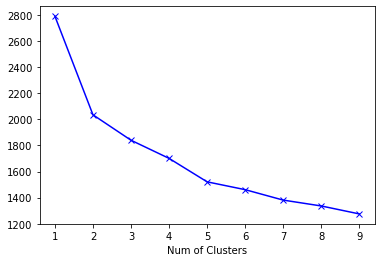

In [70]:
plt.plot(K, cost, 'bx-')
plt.xlabel('Num of Clusters')

In [71]:
#modeling ulang
kmode = KModes(n_clusters=4, init='random', n_init=5, verbose=1, random_state=42)
clusters = kmode.fit_predict(df_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 301, cost: 1710.0
Run 1, iteration: 2/100, moves: 131, cost: 1710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 174, cost: 1737.0
Run 2, iteration: 2/100, moves: 1, cost: 1737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 165, cost: 1747.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 257, cost: 1669.0
Run 4, iteration: 2/100, moves: 53, cost: 1645.0
Run 4, iteration: 3/100, moves: 0, cost: 1645.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 62, cost: 1712.0
Best run was number 4


In [72]:
df_cust['Cluster'] = clusters

In [73]:
df_cust.head()

,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster
Customer ID,,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,0
JP-15520,Female,Married,3000-3999,40-59,BOD,West,1
SR-20425,Female,Married,0-999,10-24,Self Employed,West,2
ST-20530,Male,Married,1000-1999,40-59,Officer,East,1
JL-15130,Male,Not Married,0-999,10-24,Staff,South,3


In [74]:
df_cust.groupby('Cluster').describe()

Gender                     Marital Status                           \
         count unique     top freq          count unique          top freq   
Cluster                                                                      
0          296      2  Female  189            296      3  Not Married  217   
1          161      2    Male  118            161      3      Married  127   
2          210      2  Female  155            210      3      Married  154   
3          126      2    Male  112            126      3  Not Married  100   

        Salary                          Age                    Occupation  \
         count unique        top freq count unique    top freq      count   
Cluster                                                                     
0          296      5  1000-1999  188   296      4  25-39  250        296   
1          161      4  1000-1999  106   161      4  40-59  101        161   
2          210      3      0-999  203   210      3  10-24  168        210   
3          126      3      0-999  124   126      3  10-24   91        126   

                                      Region                    
        unique               top freq  count unique   top freq  
Cluster                                                         
0            9           Officer  120    296      4  East  123  
1            8  Customer Analyst   68    161      4  West   84  
2            6  Customer Service   99    210      4  West  106  
3            5     Self Employed   54    126      4  East   56

In [75]:
df_cust[df_cust['Cluster']==4]['Marital Status'].value_counts()

Series([], Name: Marital Status, dtype: int64)

#### Summary Cluster

- Cluster 0 : Perempuan berusia 10-24 dan sudah menikah, pekerjaan customer service dengan range salary 0-999 di region west
- Cluster 1 : Perempuan berusia 25-39 dan Belum/Tidak menikah, pekerjaan Officer dengan range salary 1000-1999 di region west
- Cluster 2 : laki-laki berusia 40-59 dan sudah menikah, pekerjaan Officer dengan range salary 1000-1999 di region East
- Cluster 3 : Laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan staff dengan range salary 0-999 di region East
*   Item daftar



In [76]:
df_cust.head()

,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster
Customer ID,,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,0
JP-15520,Female,Married,3000-3999,40-59,BOD,West,1
SR-20425,Female,Married,0-999,10-24,Self Employed,West,2
ST-20530,Male,Married,1000-1999,40-59,Officer,East,1
JL-15130,Male,Not Married,0-999,10-24,Staff,South,3


In [77]:
df_cust['Cluster'] = df_cust['Cluster'].map({0:'Perempuan berusia 10-24 dan sudah menikah, pekerjaan customer service dengan range salary 0-999 di region west',
                                                       1 :'Perempuan berusia 25-39 dan Belum/Tidak menikah, pekerjaan Officer dengan range salary 1000-1999 di region west',
                                                       2 :'laki-laki berusia 40-59 dan sudah menikah, pekerjaan Officer dengan range salary 1000-1999 di region East',
                                                       3 :'Laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan staff dengan range salary 0-999 di region East'})

In [78]:
df_cust.head()

,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster
Customer ID,,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,"Perempuan berusia 10-24 dan sudah menikah, pek..."
JP-15520,Female,Married,3000-3999,40-59,BOD,West,Perempuan berusia 25-39 dan Belum/Tidak menika...
SR-20425,Female,Married,0-999,10-24,Self Employed,West,"laki-laki berusia 40-59 dan sudah menikah, pek..."
ST-20530,Male,Married,1000-1999,40-59,Officer,East,Perempuan berusia 25-39 dan Belum/Tidak menika...
JL-15130,Male,Not Married,0-999,10-24,Staff,South,Laki-laki berusia 25-39 dan Belum/Tidak menika...


### RFM Analysis

In [79]:
df_order.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [80]:
rfm_prep = df_order[['Customer ID', 'Order Date', 'Sales']]

In [81]:
rfm_prep.head(3)

,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.96
1,CG-12520,2016-11-08,731.94
2,DV-13045,2016-06-12,14.62


In [82]:
rfm_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Sales        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


#### Recency

In [83]:
last_transaction = rfm_prep['Order Date'].max()
recency = rfm_prep.groupby('Customer ID')['Order Date'].max().reset_index(name='Last Order Date')
recency['recency'] = last_transaction - recency['Last Order Date']
recency['recency'] = recency['recency'].astype('str')

In [84]:
recency.head(3)

,Customer ID,Last Order Date,recency
0,AA-10315,2017-06-29,184 days
1,AA-10375,2017-12-11,19 days
2,AA-10480,2017-04-15,259 days


In [85]:
recency['recency'] = recency['recency'].str.replace(' days', '')
recency['recency'] = recency['recency'].astype('float64')

In [86]:
recency.head(3)

,Customer ID,Last Order Date,recency
0,AA-10315,2017-06-29,184.0
1,AA-10375,2017-12-11,19.0
2,AA-10480,2017-04-15,259.0


<AxesSubplot:xlabel='recency', ylabel='Density'>

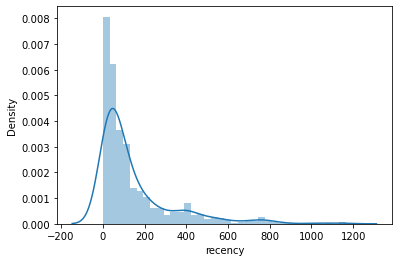

In [87]:
sns.distplot(recency['recency'])

#### Frequency

In [88]:
frequency = rfm_prep.groupby('Customer ID')['Sales'].count().reset_index(name='frequency')

In [89]:
frequency.head(3)

,Customer ID,frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12


<AxesSubplot:xlabel='frequency', ylabel='Density'>

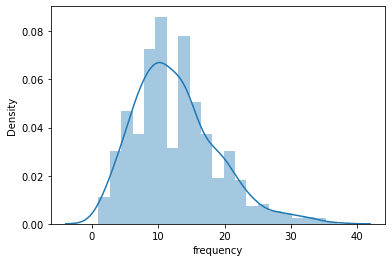

In [90]:
sns.distplot(frequency['frequency'])

#### Monetary

In [91]:
monetary = rfm_prep.groupby('Customer ID')['Sales'].sum().reset_index(name='monetary')

In [92]:
monetary.head(3)

,Customer ID,monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512


<AxesSubplot:xlabel='monetary', ylabel='Density'>

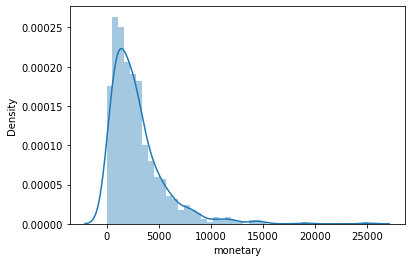

In [93]:
sns.distplot(monetary['monetary'])

#### Gabungkan recency, frequency, dan monetary

In [94]:
recency.drop(columns=['Last Order Date'], inplace=True)

In [95]:
df_1 = recency.merge(frequency, how='left', on='Customer ID')
rfm_df = df_1.merge(monetary, how='left', on='Customer ID')

In [96]:
rfm_df.head(3)

,Customer ID,recency,frequency,monetary
0,AA-10315,184.0,11,5563.560
1,AA-10375,19.0,15,1056.390
2,AA-10480,259.0,12,1790.512


### Modeling

In [97]:
from sklearn.cluster import KMeans
import math

**Menentukan jumlah cluster menggunakan elbow method**

Recency

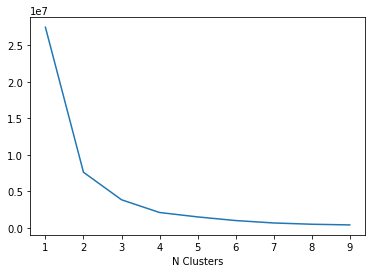

In [98]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(recency[['recency']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Frequency

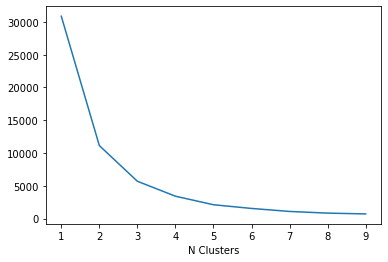

In [99]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(frequency[['frequency']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Monetary

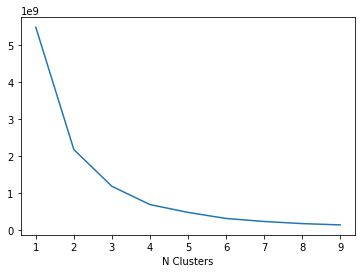

In [100]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(monetary[['monetary']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Baik recency, frequency, maupun monetary ketiganya kita tentukan memiliki jumlah cluster sama dengan 3

In [101]:
recency.head(3)

,Customer ID,recency
0,AA-10315,184.0
1,AA-10375,19.0
2,AA-10480,259.0


In [102]:
model_r = KMeans(n_clusters=3, max_iter=1000).fit(recency[['recency']])
recency['recency_c'] = model_r.predict(recency[['recency']])

In [103]:
recency['recency_c'].value_counts()

0    626
2    132
1     35
Name: recency_c, dtype: int64

In [104]:
c_1 = recency.groupby('recency_c')['recency'].mean().reset_index()
c_1 = c_1.sort_values(by='recency', ascending=False).reset_index(drop=True)
c_1['index'] = c_1.index

In [105]:
c_1

,recency_c,recency,index
0,1,771.000000,0
1,2,359.992424,1
2,0,66.948882,2


In [106]:
recency.head()

,Customer ID,recency,recency_c
0,AA-10315,184.0,0
1,AA-10375,19.0,0
2,AA-10480,259.0,2
3,AA-10645,55.0,0
4,AB-10015,415.0,2


In [107]:
def reorder_cluster(var, target_var, df, ascending=True):
    
    df_new = df.groupby(var)[target_var].mean().reset_index()
    df_new = df_new.sort_values(by=target_var, ascending=ascending).reset_index(drop=True)
    
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[var, 'index']], on=var)
    df_final = df_final.drop([var], axis=1)
    df_final = df_final.rename(columns={'index': var})
    return df_final

In [108]:
#recency
model_r = KMeans(n_clusters=3, max_iter=1000)
model_r.fit(rfm_df[['recency']])
rfm_df['recency_c'] = model_r.predict(rfm_df[['recency']])
rfm_df = reorder_cluster('recency_c', 'recency', rfm_df, ascending=False)

#frequency
model_f = KMeans(n_clusters=3, max_iter=1000)
model_f.fit(rfm_df[['frequency']])
rfm_df['frequency_c'] = model_f.predict(rfm_df[['frequency']])
rfm_df = reorder_cluster('frequency_c', 'frequency', rfm_df, ascending=True)

#monetary
model_m = KMeans(n_clusters=3, max_iter=1000)
model_m.fit(rfm_df[['monetary']])
rfm_df['monetary_c'] = model_m.predict(rfm_df[['monetary']])
rfm_df = reorder_cluster('monetary_c', 'monetary', rfm_df, ascending=True)

In [109]:
rfm_df.head()

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c
0,AA-10315,184.0,11,5563.5600,2,1,1
1,AA-10645,55.0,18,5086.9350,2,1,1
2,AD-10180,29.0,12,6106.8800,2,1,1
3,AG-10675,97.0,15,3489.0396,2,1,1
4,AH-10210,6.0,13,4805.3440,2,1,1


In [110]:
rfm_df.groupby('frequency_c')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_c,,,,,,,,
0,331.0,7.066465,2.385904,1.0,5.0,7.0,9.0,10.0
1,325.0,13.898462,2.147098,11.0,12.0,14.0,15.0,18.0
2,137.0,22.905109,4.076264,19.0,20.0,22.0,25.0,37.0


### Overall Scoring

In [111]:
rfm_df['Overall_Scoring'] = rfm_df['recency_c'] + rfm_df['frequency_c'] + rfm_df['monetary_c']

In [112]:
rfm_df.head(2)

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring
0,AA-10315,184.0,11,5563.560,2,1,1,4
1,AA-10645,55.0,18,5086.935,2,1,1,4


In [113]:
rfm_df.groupby('Overall_Scoring').agg({'recency': 'mean',
                                      'frequency': 'mean',
                                      'monetary': 'mean'})

,recency,frequency,monetary
Overall_Scoring,,,
0,787.200000,5.000000,1032.004360
1,384.487500,6.687500,1026.865239
2,127.429224,8.068493,1342.837830
3,87.105263,12.784211,2370.286423
4,77.417722,15.500000,4175.410968
5,78.319588,21.422680,5773.000013
6,70.375000,25.458333,9379.987208


In [114]:
rfm_df['segment_overall_scoring'] = ['A' if x >=5 else 'B' if x>=3 else 'C' for x in rfm_df['Overall_Scoring']]

In [115]:
rfm_df['segment_overall_scoring'].value_counts()

B    348
C    324
A    121
Name: segment_overall_scoring, dtype: int64

#### scoring manual

In [116]:
kolom_rfm = ['recency_c', 'frequency_c', 'monetary_c']

for kolom in kolom_rfm:
    rfm_df[kolom] = rfm_df[kolom].astype('str')

In [117]:
rfm_df['Scoring'] = rfm_df['recency_c'] + rfm_df['frequency_c'] + rfm_df['monetary_c']

In [118]:
rfm_df.head(3)

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring
0,AA-10315,184.0,11,5563.560,2,1,1,4,B,211
1,AA-10645,55.0,18,5086.935,2,1,1,4,B,211
2,AD-10180,29.0,12,6106.880,2,1,1,4,B,211


In [119]:
rfm_df['Scoring'].value_counts()

200    184
210    139
211    123
100     77
221     75
201     36
220     25
000     25
110     24
222     24
212     17
111     10
011      6
101      5
122      5
120      4
010      3
202      3
112      3
121      3
022      1
102      1
Name: Scoring, dtype: int64

In [120]:
def cluster_rfm(x):
    if x['Scoring'] == '222':
        cat = 'Best Customer'
    elif x['Scoring'] == '102' or x['Scoring'] == '112':
        cat = 'Big Amount Sales'
    elif x['Scoring'] == '120' or x['Scoring'] == '121':
        cat = 'Loyal Customer'
    elif x['Scoring'] == '200' or x['Scoring'] == '210' or x['Scoring'] == '201' or x['Scoring'] =='211':
        cat = 'Recent Customer'
    elif x['Scoring'] == '100' or x['Scoring'] == '101' or x['Scoring'] == '110':
        cat = 'Almost Lost'
    elif x['Scoring'] == '001' or x['Scoring'] == '011':
        cat = 'Lost Customer'
    elif x['Scoring'] == '000' or x['Scoring'] == '010':
        cat = 'Lost Cheap Customer'
    else:
        cat = 'Others'
    return cat

rfm_df['RFM_cluster'] = rfm_df.apply(lambda x: cluster_rfm(x), axis=1)

In [121]:
rfm_df.head()

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring,RFM_cluster
0,AA-10315,184.0,11,5563.5600,2,1,1,4,B,211,Recent Customer
1,AA-10645,55.0,18,5086.9350,2,1,1,4,B,211,Recent Customer
2,AD-10180,29.0,12,6106.8800,2,1,1,4,B,211,Recent Customer
3,AG-10675,97.0,15,3489.0396,2,1,1,4,B,211,Recent Customer
4,AH-10210,6.0,13,4805.3440,2,1,1,4,B,211,Recent Customer


<AxesSubplot:>

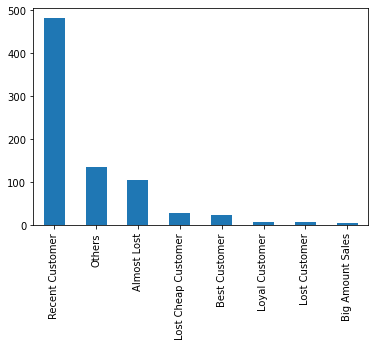

In [122]:
rfm_df['RFM_cluster'].value_counts().plot(kind='bar')

In [123]:
df_cust.reset_index(inplace=True)
df_cust.rename(columns={'Cluster': 'Cluster Demo'}, inplace=True)

In [125]:
df_cust.head(2)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster Demo
0,FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,"Perempuan berusia 10-24 dan sudah menikah, pek..."
1,JP-15520,Female,Married,3000-3999,40-59,BOD,West,Perempuan berusia 25-39 dan Belum/Tidak menika...


In [126]:
cust_segment = df_cust.merge(rfm_df, how='left', on='Customer ID')

In [127]:
cust_segment.head(2)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster Demo,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring,RFM_cluster
0,FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,"Perempuan berusia 10-24 dan sudah menikah, pek...",184.0,10,3889.366,2,0,1,3,B,201,Recent Customer
1,JP-15520,Female,Married,3000-3999,40-59,BOD,West,Perempuan berusia 25-39 dan Belum/Tidak menika...,8.0,16,3635.594,2,1,1,4,B,211,Recent Customer


In [128]:
segment_result = cust_segment[['Customer ID', 'Cluster Demo', 'recency', 'frequency', 'monetary', 'segment_overall_scoring', 'RFM_cluster']]

In [129]:
segment_result.to_csv('customer_segmentation.csv', index=False)

In [130]:
segment_result.head(3)

,Customer ID,Cluster Demo,recency,frequency,monetary,segment_overall_scoring,RFM_cluster
0,FC-14335,"Perempuan berusia 10-24 dan sudah menikah, pek...",184.0,10,3889.366,B,Recent Customer
1,JP-15520,Perempuan berusia 25-39 dan Belum/Tidak menika...,8.0,16,3635.594,B,Recent Customer
2,SR-20425,"laki-laki berusia 40-59 dan sudah menikah, pek...",8.0,9,3233.481,B,Recent Customer
